[385.30732705  -1.38691476] [[1.72112047e+02 2.66750725e-01]
 [2.66750725e-01 4.34657032e-04]]


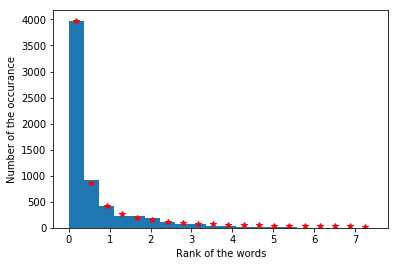

In [5]:
fp = open('Alice.txt','r',encoding='UTF-8')
import matplotlib.pyplot as plt


line  = fp.readline()
my_dict = {}

while line:
    s = line.split()
    for x in s:
        if x not in my_dict:
            my_dict[x] = 1
        else:
            my_dict[x] += 1
    line = fp.readline()

fp.close() 

num = []

for key in my_dict:
    num.append(my_dict[key])
import numpy as np
num.sort()
num.reverse()
lognum=np.log(num)
a= plt.hist(lognum, 20)

dx = (a[1][1]-a[1][0])
bin_center = np.array(a[1][0:-1])+dx/2

from scipy import optimize
def test_func(x, amp, alpha):
    return amp *x**alpha

params, params_covariance = optimize.curve_fit(test_func, bin_center, a[0])
print(params, params_covariance)
#plt.hist(money, bins)
plt.plot(bin_center, test_func(bin_center, params[0], params[1]), "r*",label='Fitted function')    

plt.xlabel("Rank of the words")
plt.ylabel("Number of the occurance")

plt.show()